In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict

load_dotenv()

True

In [2]:
model = ChatGroq(model="llama-3.1-8b-instant", temperature=0)

In [3]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percentage: float
    summary: str

In [4]:
def calculate_sr(state: BatsmanState) -> BatsmanState:

    runs = state['runs']
    balls = state['balls']

    sr = runs / balls *100
    

    return {'sr': sr}

In [5]:
def calculate_bpb(state: BatsmanState) -> BatsmanState:


    bpb = state['balls'] / (state['fours'] + state['sixes'])
    
    return {'bpb': bpb}

In [6]:
def calculate_boundary_percentage(state: BatsmanState) -> BatsmanState:

    boundary_percentage = (((state['fours'] * 4) + (state['sixes'] * 6)) / state['runs']) * 100

    return {'boundary_percentage': boundary_percentage}


In [7]:
def summary(state: BatsmanState) -> BatsmanState:

    print(f"Runs: {state['runs']}")
    print(f"Balls: {state['balls']}")
    print(f"Fours: {state['fours']}")
    print(f"Sixes: {state['sixes']}")
    print(f"Strike Rate: {state['sr']:.2f}")
    print(f"Balls per Boundary: {state['bpb']:.2f}")
    print(f"Boundary Percentage: {state['boundary_percentage']:.2f}%")

    return state


In [8]:
graph = StateGraph(BatsmanState)

#nodes
graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("summary", summary)

#edges
graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_boundary_percentage")

graph.add_edge("calculate_sr", "summary")
graph.add_edge("calculate_bpb", "summary")
graph.add_edge("calculate_boundary_percentage", "summary")

graph.add_edge("summary", END)

workflow = graph.compile()

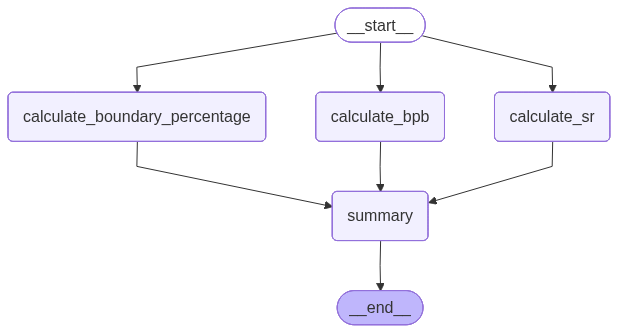

In [9]:
workflow

In [10]:
inital_state = {'runs': 120, 'balls': 100, 'fours': 10, 'sixes': 5}

final_state = workflow.invoke(inital_state)
print(final_state)

Runs: 120
Balls: 100
Fours: 10
Sixes: 5
Strike Rate: 120.00
Balls per Boundary: 6.67
Boundary Percentage: 58.33%
{'runs': 120, 'balls': 100, 'fours': 10, 'sixes': 5, 'sr': 120.0, 'bpb': 6.666666666666667, 'boundary_percentage': 58.333333333333336}
